In [17]:
cd /home/mahadev/Documents/IPCV/PRE-PROCESSING

/home/mahadev/Documents/IPCV/PRE-PROCESSING


In [12]:
ls

1.jpeg  binary.png      noise.jpeg  rotated.png  t2.PNG
1.PNG   color.jpeg      out.png     smooth.png   t3.PNG
2.jpeg  grey_scale.png  result.png  t1.PNG       thinn.png


In [13]:
import sys 
import cv2 
import argparse
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter
input_file = sys.argv[1]

path = "2.jpeg"

def original(path):
    img = im.open(path)
    img.show() #preview the image in the default image editor of your OS

    '''Image Properties'''
    print("filename:",img.filename)
    print("format:", img.format)
    print("mode:", img.mode)
    print("size:", img.size)
    print("width*height", img.width, "*", img.height)
    print("palette:", img.palette)
    print("Image Info:", img.info)

In [40]:
import cv2
import numpy as np
from scipy.ndimage import interpolation as inter
import matplotlib.pyplot as plt
def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, -best_angle*27, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

if __name__ == '__main__':
    image = cv2.imread("unskew.jpeg")
    angle, rotated = correct_skew(image)
    print(-angle*27)
    cv2.imshow('rotated with angle '+str(-angle*27)+" degree", rotated)
    cv2.imshow('original', image)
    cv2.imwrite('rotated.png', rotated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

-27


In [42]:
import cv2
import numpy as np

# Load as greyscale
im = cv2.imread('unskew.jpeg', cv2.IMREAD_GRAYSCALE)

# Invert
im = 255 - im

# Calculate horizontal projection
proj = np.sum(im,1)

# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0],500))

# Draw a line for each row
for row in range(im.shape[0]):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

# Save result
cv2.imshow('img', result)
cv2.imshow('orig', im)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('hist.png', result)

True

In [57]:
import cv2

# Load in image, convert to grayscale, and threshold
image = cv2.imread('rotated.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find and remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,255,0), 3)

# Find and remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,255,0), 3)

# Mask out unwanted areas for result
result = cv2.bitwise_and(image,image,mask=thresh)
result[thresh==0] = (255,255,255)

cv2.imshow('thresh', thresh)
cv2.imshow('result', result)
cv2.imwrite('result.png', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

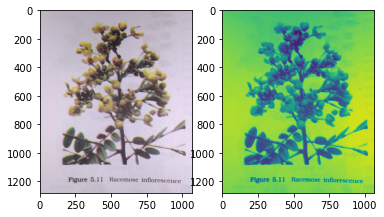

In [58]:
def bgr2grey(path):
    #Python's Lambda(anonymous) expression. Apply simple math and convert to a list(of pixles)
    img = im.open(path)
    AllPixels = list(map(lambda x: int((x[0] + x[1] + x[2])/3), list(img.getdata()))) 
    GreyscaleImg = im.new("L", (img.size[0], img.size[1]), 255)   #instantiate an image
    GreyscaleImg.putdata(AllPixels)   #Copies pixel list to this image
    GreyscaleImg.show()               #preview image
    GreyscaleImg.save('grey_scale.png')
    plt.subplot(121), plt.imshow(img) 
    plt.subplot(122), plt.imshow(GreyscaleImg) 
    plt.show()
bgr2grey("color.jpeg")

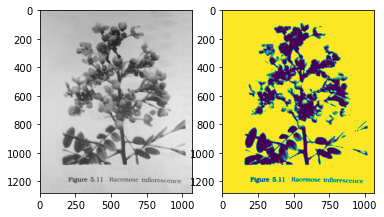

In [59]:
def binarization(path):
    # convert to binary
    img0=cv2.imread(path)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    height = img.shape[0]
    width = img.shape[1]
    threshold = 127

    for i in np.arange(height):
        for j in np.arange(width):
            a = img.item(i,j) 
            if a > threshold:
               b = 255
            else:
               b = 0
            img.itemset((i,j), b)

    cv2.imwrite('binary.png', img)
    cv2.imshow('binary_image',img)
    cv2.imshow('grey_image',img0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    plt.subplot(121), plt.imshow(img0) 
    plt.subplot(122), plt.imshow(img) 
    plt.show()
binarization('grey_scale.png')

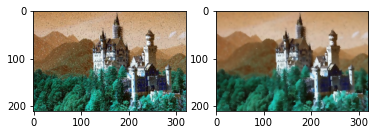

In [63]:
def noise_remove(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (320,210))
    # Apply Bilateral Filter
    img1 = cv2.bilateralFilter(img,7,100,100)
    cv2.imshow('Original', img)
    cv2.imshow('bilateral_filtered', img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()  
    cv2.imwrite('smooth.png', img1)
    plt.subplot(121), plt.imshow(img) 
    plt.subplot(122), plt.imshow(img1) 
    plt.show()
noise_remove('1.PNG')

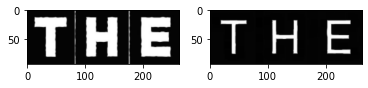

In [60]:
def Thinning_Skeletonization(path):
    img = cv2.imread(path)
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations =5)
    plt.subplot(121), plt.imshow(img) 
    plt.subplot(122), plt.imshow(erosion)
    cv2.imwrite('thinn.png', erosion)
    plt.show()
Thinning_Skeletonization('t2.PNG')

In [61]:
import numpy as np
import cv2

# read
img = cv2.imread('1.jpeg', cv2.IMREAD_GRAYSCALE)

# increase contrast
pxmin = np.min(img)
pxmax = np.max(img)
imgContrast = (img - pxmin) / (pxmax - pxmin) * 255

# increase line width
kernel = np.ones((5,5), np.uint8)
imgMorph = cv2.erode(imgContrast, kernel, iterations = 1)


# write
cv2.imwrite('out.png', imgMorph)

True

# IMAGE SEGMENTATION 

In [5]:
cd /home/mahadev/Documents/IPCV/SEGMENTATION/

/home/mahadev/Documents/IPCV/SEGMENTATION


In [6]:
import cv2

img = cv2.imread('10.PNG')
img = img[5:-5,5:-5,:]
mser = cv2.MSER_create()

#Resize the image so that MSER can work better
img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

regions = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, True, (255,0,0),1,1) #BGR

cv2.namedWindow('img', 0)
cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()

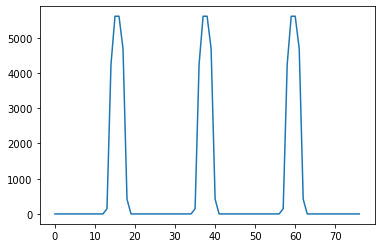

In [7]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('10.PNG', 0)
img = 255-img

img_row_sum = np.sum(img,axis=0).tolist()
#plt.imshow(img1)
plt.plot(img_row_sum)
plt.show()

In [8]:
import cv2

img = cv2.imread('11.PNG')
img = img[5:-5,5:-5,:]
mser = cv2.MSER_create()

#Resize the image so that MSER can work better
img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

regions = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls,True, (255,0,0),1,1) #BGR

cv2.namedWindow('img', 0)
cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()

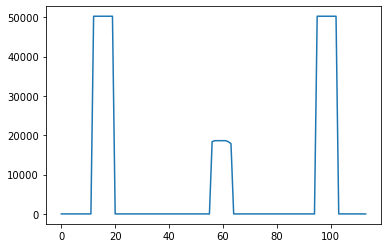

In [9]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('11.PNG',0)
img = 255-img

img_row_sum = np.sum(img,axis=1).tolist()
#plt.imshow(img)
plt.plot(img_row_sum)
plt.show()

In [10]:
import cv2
import numpy as np

# Load as greyscale
im = cv2.imread('11.PNG', cv2.IMREAD_GRAYSCALE)

# Invert
im = 255 - im

# Calculate horizontal projection
proj = np.sum(im,1)

# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0],500))

# Draw a line for each row
for row in range(im.shape[0]):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

# Save result
cv2.imshow('img', result)
cv2.imshow('orig', im)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('hist.png', result)

True

In [70]:
from collections import namedtuple
from typing import List

import cv2
import numpy as np

BBox = namedtuple('BBox', 'x, y, w, h')
DetectorRes = namedtuple('DetectorRes', 'img, bbox')


def detect_words(img: np.ndarray, kernel_size: int, sigma: int, theta: int, min_area: int) -> List[DetectorRes]:
    """Scale space technique for word segmentation proposed by R. Manmatha
    see paper http://ciir.cs.umass.edu/pubfiles/mm-27.pdf
    Args:
        img: grayscale uint8 image
        kernel_size: size of filter kernel, must be an odd integer
        sigma: standard deviation of Gaussian function used for filter kernel
        theta: approximated width/height ratio of words, filter function is distorted by this factor
        min_area: ignore word candidates smaller than specified area
    Returns:
        List of DetectorRes instances, each containing the bounding box and the image of a segmented word
    """
    assert img.ndim == 2
    assert img.dtype == np.uint8

    # apply filter kernel
    kernel = get_kernel(kernel_size, sigma, theta)
    img_filtered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
    img_thres = 255 - cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # append components to result
    res = []
    cropped_imgs=[]
    components = cv2.findContours(img_thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    for c in components:
        # skip small word candidates
        if cv2.contourArea(c) < min_area:
            continue
        # append bounding box and image of word to result list
        x, y, w, h = cv2.boundingRect(c)  # bounding box as tuple (x, y, w, h)
        crop = img[y:y + h, x:x + w]
        cropped_imgs.append(crop)
        res.append(DetectorRes(crop, BBox(x, y, w, h)))

    return res,cropped_imgs


def prepare_img(img: np.ndarray, height: int) -> np.ndarray:
    """convert given image to grayscale image (if needed) and resize to given height"""
    assert img.ndim in (2, 3)
    assert height > 0
    assert img.dtype == np.uint8
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h = img.shape[0]
    factor = height / h
    return cv2.resize(img, dsize=None, fx=factor, fy=factor)


def get_kernel(kernel_size: int, sigma: int, theta: int) -> np.ndarray:
    """create anisotropic filter kernel"""
    assert kernel_size % 2  # must be odd size
    half_size = kernel_size // 2

    kernel = np.zeros([kernel_size, kernel_size])
    sigma_x = sigma
    sigma_y = sigma * theta

    # TODO: vectorize!
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - half_size
            y = j - half_size

            exp_term = np.exp(-x ** 2 / (2 * sigma_x) - y ** 2 / (2 * sigma_y))
            x_term = (x ** 2 - sigma_x ** 2) / (2 * np.math.pi * sigma_x ** 5 * sigma_y)
            y_term = (y ** 2 - sigma_y ** 2) / (2 * np.math.pi * sigma_y ** 5 * sigma_x)

            kernel[i, j] = (x_term + y_term) * exp_term

    kernel = kernel / np.sum(kernel)
    return kernel

no. of lines:  24


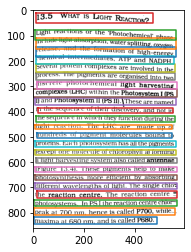

In [71]:
import argparse
from typing import List
import cv2 as cv
from path import Path
import matplotlib.pyplot as plt

# load image and process it
img = prepare_img(cv2.imread('croped.PNG'),860)
res = detect_words(img,kernel_size=99, sigma=23, theta=55, min_area=1200)
print("no. of lines: ",len(res[0]))
# plot results
plt.imshow(img, cmap='gray')
for det in res[0]:
    xs = [det.bbox.x, det.bbox.x, det.bbox.x + det.bbox.w, det.bbox.x + det.bbox.w, det.bbox.x]
    ys = [det.bbox.y, det.bbox.y + det.bbox.h, det.bbox.y + det.bbox.h, det.bbox.y, det.bbox.y]
    plt.plot(xs, ys)
plt.savefig("line detect")
plt.show()

In [72]:
import cv2
import numpy as np

# Load as greyscale
im = cv2.imread('croped.PNG', cv2.IMREAD_GRAYSCALE)

# Invert
im = 255 - im

# Calculate horizontal projection
proj = np.sum(im,1)

# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0],500))

# Draw a line for each row
for row in range(im.shape[0]):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

# Save result
cv2.imshow('img', result)
cv2.imshow('orig', im)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('hist.png', result)

True

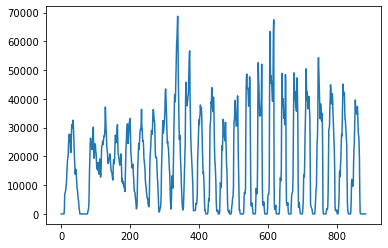

In [73]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('croped.PNG', 0)
img = 255-img

img_row_sum = np.sum(img,axis=1).tolist()
#plt.imshow(img1)
plt.plot(img_row_sum)
plt.show()

In [74]:
cd /home/mahadev/Documents/IPCV/SEGMENTATION/lines detected/

/home/mahadev/Documents/IPCV/SEGMENTATION/lines detected


In [75]:
cropped_imgs=res[1]
n=0
for i in cropped_imgs:
    cv2.imwrite("line_"+str(n)+".png", i)
    n+=1

In [76]:
cd /home/mahadev/Documents/IPCV/SEGMENTATION/

/home/mahadev/Documents/IPCV/SEGMENTATION


no. of words detected:  5


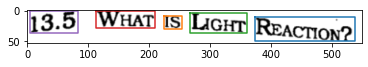

In [77]:
import argparse
from typing import List
import cv2 as cv
from path import Path
import matplotlib.pyplot as plt

# load image and process it
img = prepare_img(cv2.imread('line_23.png'),50)
res = detect_words(img,kernel_size=19, sigma=20, theta=10, min_area=150)
print("no. of words detected: ",len(res[0]))
# plot results
plt.imshow(img, cmap='gray')
for det in res[0]:
    xs = [det.bbox.x, det.bbox.x, det.bbox.x + det.bbox.w, det.bbox.x + det.bbox.w, det.bbox.x]
    ys = [det.bbox.y, det.bbox.y + det.bbox.h, det.bbox.y + det.bbox.h, det.bbox.y, det.bbox.y]
    plt.plot(xs, ys)
plt.savefig("word detect")
plt.show()

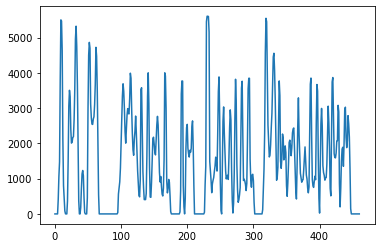

In [78]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread("line_23.png", 0)
img = 255-img

img_row_sum = np.sum(img,axis=0).tolist()
#plt.imshow(img1)
plt.plot(img_row_sum)
plt.show()

In [79]:
cd /home/mahadev/Documents/IPCV/SEGMENTATION/words detected

/home/mahadev/Documents/IPCV/SEGMENTATION/words detected


In [80]:
cropped_imgs=res[1]
n=0
for i in cropped_imgs:
    cv2.imwrite("word_"+str(n)+".png", i)
    n+=1

In [81]:
cd /home/mahadev/Documents/IPCV/SEGMENTATION/

/home/mahadev/Documents/IPCV/SEGMENTATION


no. of letters :  17


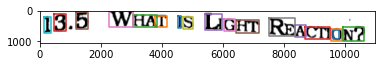

In [82]:
img = cv2.imread('line_23.png', cv2.IMREAD_GRAYSCALE)
h,w=img.shape
img = prepare_img(img,1000)
kernel_size, sigma, theta, min_area = 3,10, 5, 28000
kernel = get_kernel(kernel_size, sigma, theta)
img_filtered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
img_thres = 255 - cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

res = []
cropped_imgs=[]
components = cv2.findContours(img_thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
for c in components:
    # skip small word candidates
    if cv2.contourArea(c) < min_area:
        continue
    # append bounding box and image of word to result list
    x, y, w, h = cv2.boundingRect(c)  # bounding box as tuple (x, y, w, h)
    crop = img[y:y + h, x:x + w]
    cropped_imgs.append(crop)
    res.append(DetectorRes(crop, BBox(x, y, w, h)))
print("no. of letters : ",len(res)) 
plt.imshow(img, cmap='gray')
for det in res:
    xs = [det.bbox.x, det.bbox.x, det.bbox.x + det.bbox.w, det.bbox.x + det.bbox.w, det.bbox.x]
    ys = [det.bbox.y, det.bbox.y + det.bbox.h, det.bbox.y + det.bbox.h, det.bbox.y, det.bbox.y]
    plt.plot(xs, ys)
plt.show()

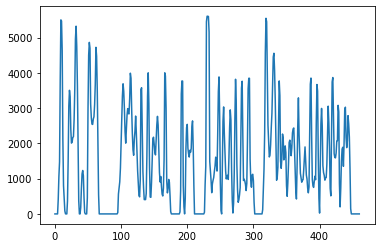

In [38]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread("line_23.png", 0)
img = 255-img

img_row_sum = np.sum(img,axis=0).tolist()
#plt.imshow(img1)
plt.plot(img_row_sum)
plt.show()

<ipython-input-83-c9e617a1d1b7>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = img_as_float(color.rgb2gray(io.imread('line_23.png')))


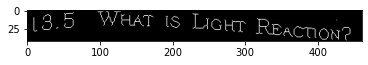

In [83]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('line_23.png')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

plt.imshow(out_skeletonize, cmap='gray')

plt.savefig('char_out.png')
plt.show()

no. of letters :  4


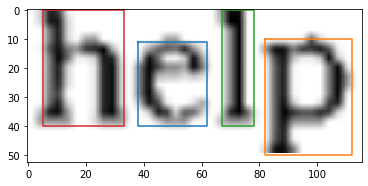

In [40]:
img = cv2.imread('word_51.png', cv2.IMREAD_GRAYSCALE)
h,w=img.shape
img = prepare_img(img,50)
kernel_size, sigma, theta, min_area = 3,10, 5, 250
kernel = get_kernel(kernel_size, sigma, theta)
img_filtered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
img_thres = 255 - cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

res = []
cropped_imgs=[]
components = cv2.findContours(img_thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
for c in components:
    # skip small word candidates
    if cv2.contourArea(c) < min_area:
        continue
    # append bounding box and image of word to result list
    x, y, w, h = cv2.boundingRect(c)  # bounding box as tuple (x, y, w, h)
    crop = img[y:y + h, x:x + w]
    cropped_imgs.append(crop)
    res.append(DetectorRes(crop, BBox(x, y, w, h)))
print("no. of letters : ",len(res)) 
plt.imshow(img, cmap='gray')
for det in res:
    xs = [det.bbox.x, det.bbox.x, det.bbox.x + det.bbox.w, det.bbox.x + det.bbox.w, det.bbox.x]
    ys = [det.bbox.y, det.bbox.y + det.bbox.h, det.bbox.y + det.bbox.h, det.bbox.y, det.bbox.y]
    plt.plot(xs, ys)
plt.savefig("word detect")
plt.show()

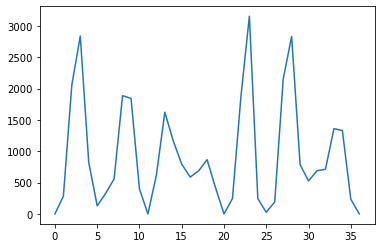

In [41]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread("word_51.png", 0)
img = 255-img

img_row_sum = np.sum(img,axis=0).tolist()
#plt.imshow(img1)
plt.plot(img_row_sum)
plt.show()

In [ ]:
cd "C:/Users/mahad/Documents/IPCV/SEGMENTATION/letters detected/"

In [ ]:
n=0
for i in cropped_imgs:
    cv2.imwrite("letter_"+str(n)+".png", i)
    n+=1

# FEATURE EXTRACTION AND CHARACTER RECOGNITION

In [1]:
cd /home/mahadev/Documents/IPCV/APPLICATION/

/home/mahadev/Documents/IPCV/APPLICATION


In [2]:
ls

binary1.png  captured_voice.mp3  evaluate_expression/  text.jpeg
binary.png   check_expression/   number_plate/


# APPLICATIONS

In [44]:
#binarization('text.jpeg')

# 1. PHOTO MATH

In [78]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
import cv2
import os
import numpy as np
import re
def readimg(path):
    img = cv2.imread(path) 
    cv2.imshow('sample image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    text=pytesseract.image_to_string(img)
    return text

In [79]:
#photo math pgm
from sympy import *
import matplotlib.pyplot as plt

def is_valid_expression(number1, operator, number2, result):
    number1 = int(number1)
    number2 = int(number2)
    result = int(result)
    if operator == '-':
        return number1 - number2 == result
    if operator == '+' or '4':
        return number1 + number2 == result
    if operator == 'x' or operator == '*':
        return number1 * number2 == result
    if operator == ":" or operator == "/":
        return number1 / number2 == result
    if operator == '%':
        return number1 % number2 == result
    
    
def evaluate_expression(text):
    x = symbols('x')
    gfg_exp = sympify(text)
    coff=[]
    n=int(input("enter order of the expression: "))
    for i in range(n+1):
        coff.append(gfg_exp.coeff(x, i))
    coff.reverse()
    print("coefficients of X: ",coff)
    root = np.roots(coff)
    return(root,n,coff)

def plot_graph(n,coff,root):
    r=[]
    for i in range(len(root)):
        r.append(root[i].real)
    x = symbols('x')
    y = np.linspace(-10,10)
    x1=np.array(r)
    f = coff
    x = np.polyval(f,y)
    y1 = np.polyval(f,x1)
    plt.plot(y,x)
    plt.scatter(x1,y1)
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('graph of '+str(n)+' degree polynomial')
    plt.grid(True)
    plt.show()

1. check expression
2. evaluate expression
3. exit
enter operation to be performed : 2
['m2.PNG', 'm3.PNG', 'm5.PNG', 'm1.PNG', 'm4.PNG']
sellect expression from above image list m2.PNG

Expression detected :  2*x**5 - 4*x**4 + 16*x**3 - 2*x

enter order of the expression: 5
coefficients of X:  [2, -4, 16, 0, -2, 0]
roots of equation:  [ 0.98485621+2.66353206j  0.98485621-2.66353206j  0.36760935+0.j
 -0.33732176+0.j          0.        +0.j        ]


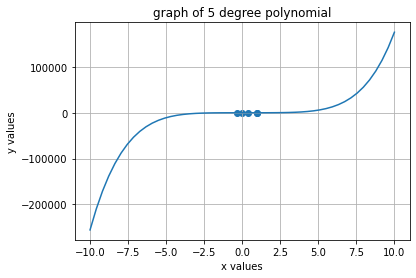

In [80]:
print("1. check expression")
print("2. evaluate expression")
print("3. exit")
a=int(input("enter operation to be performed : "))
if a>0 and a<=5:
    if a==1:
        path="check_expression"
        mylist = os.listdir(path)
        print("\n",mylist)
        img=input("\nsellect expression from above image list : ")
        exp = readimg(path+'/'+img)
        print(exp)
        data = exp.strip()
        if is_valid_expression(data[0], data[1], data[2], data[4]):
            print("Correct")
        else:
            print("Incorrect")
    elif a == 2:
        path="evaluate_expression"
        mylist = os.listdir(path)
        print(mylist)
        img=input("sellect expression from above image list ")
        exp = readimg(path+'/'+img)
        print("\nExpression detected : ",exp)
        evaluated_values=evaluate_expression(exp)
        print("roots of equation: ",evaluated_values[0])
        plot_graph(evaluated_values[1],evaluated_values[2],evaluated_values[0])
    else:
        exit()

# 2. DIGITIZATION OF HARD COPY TEXT USING OCR API

In [3]:
import cv2
import numpy as np
import requests
import io
import json

img = cv2.imread("binary.png")
height, width, _ = img.shape

# Cutting image
roi = img[0: height, 400: width]
roi = img

# Ocr
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".png", roi, [1, 90])
file_bytes = io.BytesIO(compressedimage)

result = requests.post(url_api,
              files = {"binary.png": file_bytes},
              data = {"apikey": "helloworld",
                      "language": "eng"})

result = result.content.decode()
result = json.loads(result)

parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")
print(text_detected)
cv2.imshow("roi", roi)
cv2.imshow("Img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

13.5 WHAT IS 1.2GRr REACIION?
Light reactions or the 'Photochemical' phase
include light absorption, water splitting, oxygen
release, and the formation of high-enero
chemical intermediates. ATP and NADPH.
several protein complexes are invölved in the
process. The pigments are organised into two
discrete photochemical light harvesting
compleces (LHC) within the Photosystem I
l) and Photosystem II (PS II) .\These are narned
in the sequence of their discovery, and not in
the sequence in which they function during the
light react-ion. The LHC are made up of
hundreds of pigment molecules bound to
proteins. Each phot.osystem has all the pigments
(except one molecule of chlorophyll a) forming
a light harvesting system also called antennae
(Figure 13.4). These pigments help to make
photosynthesis more efficient by absorbing
different wavelengths of light. The single
the reaction centre. The reaction centre
photosystems. In PS I the reaction centre chlor-
peak at 700 nm, hence is called P700, w

# LANGUAGE TRANSLATOR AND SPEAKER

In [7]:
language_short_name = {'aa':'Afar','ab':'Abkhazian','af':'Afrikaans','ak':'Akan','sq':'Albanian','am':'Amharic','ar':'Arabic',
'an':'Aragonese','hy':'Armenian','as':'Assamese','av':'Avaric','ae':'Avestan','ay':'Aymara','az':'Azerbaijani','ba':'Bashkir',
'bm':'Bambara','eu':'Basque','be':'Belarusian','bn':'Bengali','bh':'Bihari languages','bi':'Bislama','bo':'Tibetan','bs':'Bosnian',
'br':'Breton','bg':'Bulgarian','my':'Burmese','ca':'Catalan; Valencian','cs':'Czech','ch':'Chamorro','ce':'Chechen','zh':'Chinese',
'cu':'Church Slavic; Old Slavonic; Church Slavonic; Old Bulgarian; Old Church Slavonic','cv':'Chuvash','kw':'Cornish','co':'Corsican',
'cr':'Cree','cy':'Welsh','cs':'Czech','da':'Danish','de':'German','dv':'Divehi; Dhivehi; Maldivian','nl':'Dutch; Flemish','dz':'Dzongkha',
'el':'Greek-Modern (1453-)','en':'English','eo':'Esperanto','et':'Estonian','eu':'Basque','ee':'Ewe','fo':'Faroese','fa':'Persian',
'fj':'Fijian','fi':'Finnish','fr':'French','fy':'Western Frisian','ff':'Fulah','Ga':'Georgian','gd':'Gaelic; Scottish Gaelic','ga':'Irish',
'gl':'Galician','gv':'Manx','el':'Greek-Modern (1453-)','gn':'Guarani','gu':'Gujarati','ht':'Haitian; Haitian Creole','ha':'Hausa',
'he':'Hebrew','hz':'Herero','hi':'Hindi','ho':'Hiri Motu','hr':'Croatian','hu':'Hungarian','hy':'Armenian','ig':'Igbo','is':'Icelandic',
'io':'Ido','ii':'Sichuan Yi; Nuosu','iu':'Inuktitut','ie':'Interlingue; Occidental',
'ia':'Interlingua (International Auxiliary Language Association)','id':'Indonesian','ik':'Inupiaq','is':'Icelandic','it':'Italian',
'jv':'Javanese','ja':'Japanese','kl':'Kalaallisut; Greenlandic','kn':'Kannada','ks':'Kashmiri','ka':'Georgian','kr':'Kanuri','kk':'Kazakh',
'km':'Central Khmer','ki':'Kikuyu; Gikuyu','rw':'Kinyarwanda','ky':'Kirghiz; Kyrgyz','kv':'Komi','kg':'Kongo','ko':'Korean',
'kj':'Kuanyama; Kwanyama','ku':'Kurdish','lo':'Lao','la':'Latin','lv':'Latvian','li':'Limburgan; Limburger; Limburgish','ln':'Lingala',
'lt':'Lithuanian','lb':'Luxembourgish; Letzeburgesch','lu':'Luba-Katanga','lg':'Ganda','mk':'Macedonian','mh':'Marshallese',
'ml':'Malayalam','mi':'Maori','mr':'Marathi','ms':'Malay','Mi':'Micmac','mk':'Macedonian','mg':'Malagasy','mt':'Maltese',
'mn':'Mongolian','mi':'Maori','ms':'Malay','my':'Burmese','na':'Nauru','nv':'Navajo; Navaho','nr':'Ndebele-South; South Ndebele',
'nd':'Ndebele-North; North Ndebele','ng':'Ndonga','ne':'Nepali','nl':'Dutch; Flemish','nn':'Norwegian Nynorsk; Nynorsk:Norwegian',
'nb':'Bokmål-Norwegian; Norwegian Bokmål','no':'Norwegian','oc':'Occitan (post 1500)','oj':'Ojibwa','or':'Oriya','om':'Oromo',
'os':'Ossetian; Ossetic','pa':'Panjabi; Punjabi','fa':'Persian','pi':'Pali','pl':'Polish','pt':'Portuguese','ps':'Pushto; Pashto',
'qu':'Quechua','rm':'Romansh','ro':'Romanian; Moldavian; Moldovan','rn':'Rundi','ru':'Russian','sg':'Sango','sa':'Sanskrit',
'si':'Sinhala; Sinhalese','sk':'Slovak','sk':'Slovak','sl':'Slovenian','se':'Northern Sami','sm':'Samoan','sn':'Shona','sd':'Sindhi',
'so':'Somali','st':'Sotho-Southern','es':'Spanish; Castilian','sq':'Albanian','sc':'Sardinian','sr':'Serbian','ss':'Swati',
'su':'Sundanese','sw':'Swahili','sv':'Swedish','ty':'Tahitian','ta':'Tamil','tt':'Tatar','te':'Telugu','tg':'Tajik','tl':'Tagalog',
'th':'Thai','bo':'Tibetan','ti':'Tigrinya','to':'Tonga (Tonga Islands)','tn':'Tswana','ts':'Tsonga','tk':'Turkmen','tr':'Turkish',
'tw':'Twi','ug':'Uighur; Uyghur','uk':'Ukrainian','ur':'Urdu','uz':'Uzbek','ve':'Venda','vi':'Vietnamese','vo':'Volapük','cy':'Welsh',
'wa':'Walloon','wo':'Wolof','xh':'Xhosa','yi':'Yiddish','yo':'Yoruba','za':'Zhuang; Chuang','zh':'Chinese','zu':'Zulu'}

In [22]:
(language_short_name['ru'])

'Russian'

In [23]:
# Importing necessary modules required
from googletrans import Translator
from google_trans_new import google_translator
from gtts import gTTS
import os


get_sentence=text_detected
    
# Translator method for translation

translator = google_translator()  
    
# In which we want to convert, short
# form of hindi
to_lang = 'ru'
    
# Printing Speech which need to
# be translated.
print("Phase to be Translated :"+ get_sentence)

            # Using translate() method which requires
            # three arguments, 1st the sentence which
            # needs to be translated 2nd source language
            # and 3rd to which we need to translate in
text_to_translate = translator.translate(get_sentence,to_lang) 
            
# Storing the translated text in text
# variable
text = text_to_translate
print(text)
# Using Google-Text-to-Speech ie, gTTS() method
# to speak the translated text into the
# destination language which is stored in to_lang.
# Also, we have given 3rd argument as False because
# by default it speaks very slowly
speak = gTTS(text=text, lang=to_lang, slow= False)
# Using save() method to save the translated
# speech in capture_voice.mp3
speak.save("captured_voice.mp3")
            
# Using OS module to run the translated voice.
file = "captured_voice.mp3"
os.system("mpg123 " + file)

Phase to be Translated :13.5 WHAT IS 1.2GRr REACIION?
Light reactions or the 'Photochemical' phase
include light absorption, water splitting, oxygen
release, and the formation of high-enero
chemical intermediates. ATP and NADPH.
several protein complexes are invölved in the
process. The pigments are organised into two
discrete photochemical light harvesting
compleces (LHC) within the Photosystem I
l) and Photosystem II (PS II) .\These are narned
in the sequence of their discovery, and not in
the sequence in which they function during the
light react-ion. The LHC are made up of
hundreds of pigment molecules bound to
proteins. Each phot.osystem has all the pigments
(except one molecule of chlorophyll a) forming
a light harvesting system also called antennae
(Figure 13.4). These pigments help to make
photosynthesis more efficient by absorbing
different wavelengths of light. The single
the reaction centre. The reaction centre
photosystems. In PS I the reaction centre chlor-
peak at 700 nm,

2

# LANGUAGE DETECTOR

In [28]:
import pycld2 as cld2
_, _, _, detected_language = cld2.detect(text,  returnVectors=True)
print(detected_language[1][2])

RUSSIAN


# VEHICLE NO. PLATE DETECTION

In [32]:
cd /home/mahadev/Documents/IPCV/APPLICATION/number_plate/

/home/mahadev/Documents/IPCV/APPLICATION/number_plate


In [34]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=454492e3ee77539e56812840e0d516b6f75884e4508cc593a68b71b8b7807245
  Stored in directory: /home/mahadev/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [37]:
import cv2
import imutils
import numpy as np
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
img = cv2.imread('car1.PNG',cv2.IMREAD_COLOR)
img = imutils.resize(img, width=500 )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection

In [38]:
# find contours from the edged image and keep only the largest
# ones, and initialize our screen contour
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1=img.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
cv2.imshow("img1",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
#sorts contours based on minimum area 30 and ignores the ones below that
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:60]
screenCnt = None #will store the number plate contour
img2 = img.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3) 
cv2.imshow("img2",img2) #top 30 contours
cv2.waitKey(0)
cv2.destroyAllWindows()
count=0

In [40]:
idx=7
# loop over contours
for c in cnts:
  # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)
        if len(approx) == 4: #chooses contours with 4 corners
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c) #finds co-ordinates of the plate
                new_img=img[y:y+h,x:x+w]
                cv2.imwrite('./'+str(idx)+'.png',new_img) #stores the new image
                idx+=1
                break

In [41]:
#draws the selected contour on original image        
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
cv2.imshow("Final image with plate detected",img)
cv2.waitKey(0)
Cropped_loc='./7.png' #the filename of cropped image
cv2.imshow("cropped",cv2.imread(Cropped_loc)) 
text=pytesseract.image_to_string(Cropped_loc,lang='eng') #converts image characters to string
print("Number is:" ,text)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number is: “KAO3MG2825|

